In [1]:
# Importing libraries and data and renaming columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to \"call\" them specifically.

%matplotlib inline

In [3]:
path=r'C:\Users\User\Project Covid'

In [4]:
#Importing merged data
df_merged_covid = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'covid_merged_datanew1.csv'))

In [6]:
# 2. The elbow technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
df_merged_covid.head()

,Unnamed: 0,county_code,county_left,state,lat_left,long_left,male,female,median_age,female_percentage,covid_deaths,Population,covid_cases
0,1,1001.0,Autauga,Alabama,32.539527,-86.644082,26874,28326,37.8,51.315217,7588955,3745181060,462768132
1,768,1003.0,Baldwin,Alabama,30.727750,-87.722071,101188,106919,42.8,51.376936,7588955,3745181060,462768132
2,1562,1005.0,Barbour,Alabama,31.868263,-85.387129,13697,12085,39.9,46.873788,7588955,3745181060,462768132
3,2245,1007.0,Bibb,Alabama,32.996421,-87.125115,12152,10375,39.9,46.055844,7588955,3745181060,462768132
4,2948,1009.0,Blount,Alabama,33.982109,-86.567906,28434,29211,40.8,50.673953,7588955,3745181060,462768132


In [11]:
df_merged_covid=df_merged_covid.drop(columns = ['county_left','state','Unnamed: 0'])

In [12]:
score = [kmeans[i].fit(df_merged_covid).score(df_merged_covid) for i in range(len(kmeans))] # Creates a score that represents \n",


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_k

In [13]:
score

[-1.7794362117828427e+23,
 -3.683483551144466e+22,
 -1.8793707357125028e+22,
 -8.569602841708379e+21,
 -3.918312348923113e+21,
 -2.394960751468194e+21,
 -1.2106037761523573e+21,
 -6.045950656434698e+20,
 -4.5238393013355164e+20]

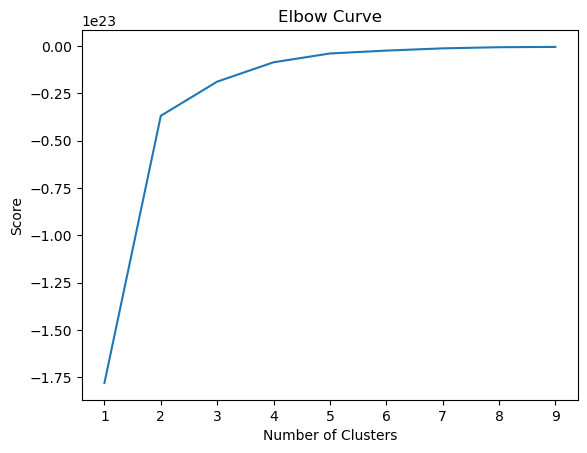

In [14]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve jumps rapidly from two to three and then three to four on the x-axis, then rises only slightly after four.This means that the optimal count for your clusters is just that four.

In [15]:
# 3. k-means clustering
kmeans = KMeans(n_clusters = 4)

In [16]:
# Fit the k-means object to the data.
kmeans.fit(df_merged_covid)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
df_merged_covid['clusters'] = kmeans.fit_predict(df_merged_covid)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df_merged_covid['clusters'].value_counts()

0    1669
2    1161
1     316
3      58
Name: clusters, dtype: int64

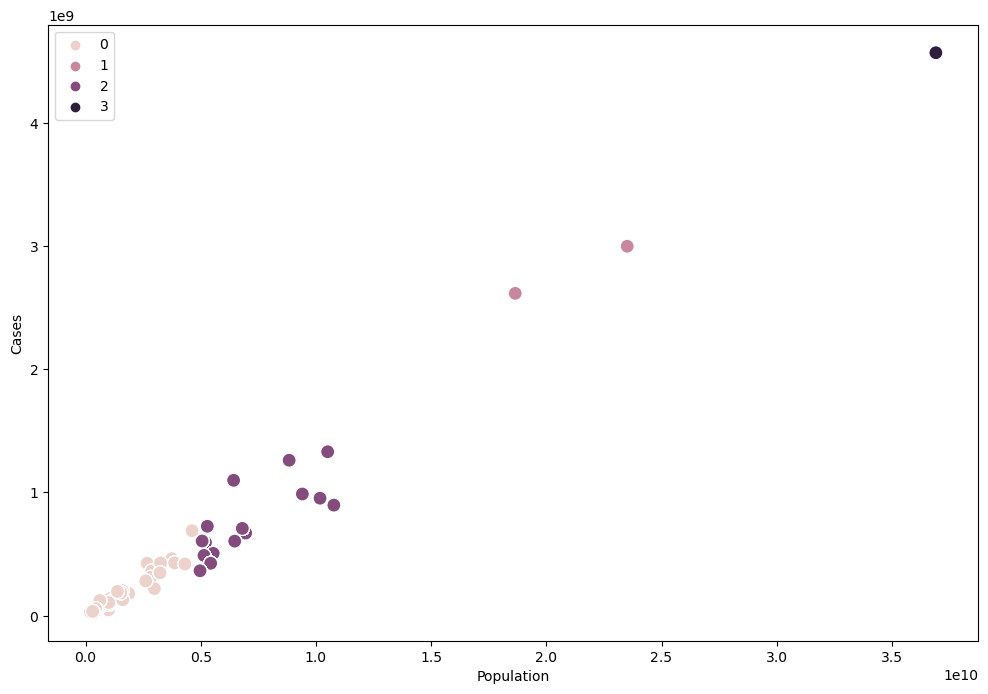

In [21]:
# Plot the clusters for the \"Price per Unit\" and \"D.metro\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged_covid['Population'], y=df_merged_covid['covid_cases'], hue=kmeans.labels_, s=100) 
#Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
 # `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
 # `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Cases') # Label y-axis.
plt.show()

The light pink (coded as “0” in the legend), is also the high populated cluster. It gathers the data points with low population and relatively low cases. The cluster, in dark pink (coded as “1” in the legend), includes points with medium population and medium cases. The cluster, in light purple (coded as “2” in the legend), contains the points with the low-medium population and the low to medium cases.The cluster, in dark purple (coded as “3” in the legend), contains the points with the high population and the high cases.

In [25]:
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cluster_cases_population.png'))

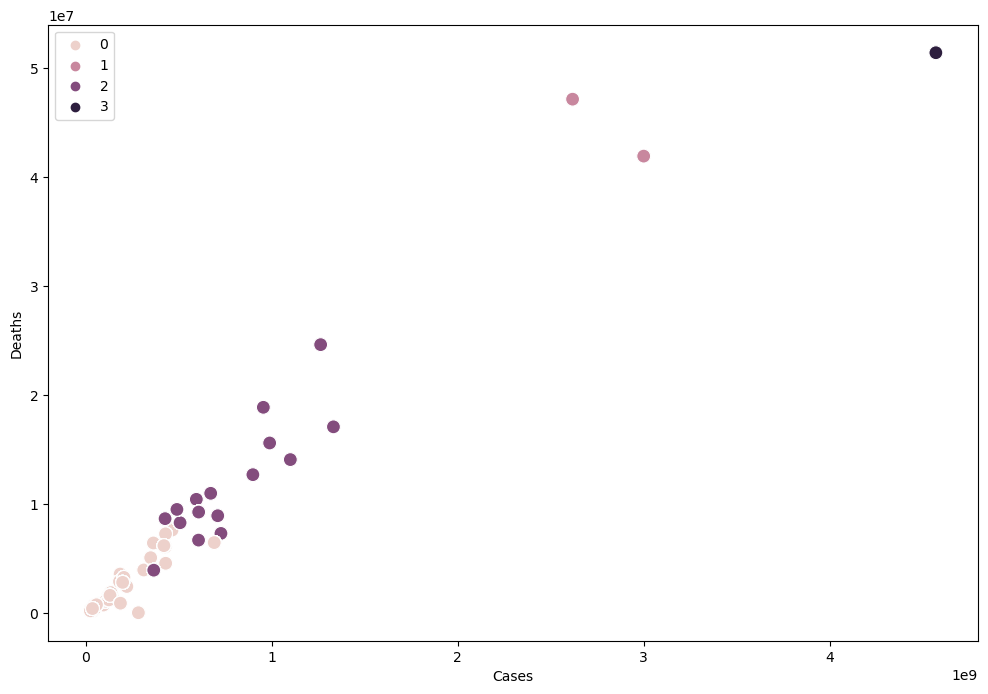

In [22]:
# Plot the clusters for the \"Price per Unit\" and \"D.metro\" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_merged_covid['covid_cases'], y=df_merged_covid['covid_deaths'], hue=kmeans.labels_, s=100) 
#Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
 # `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
 # `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cases') # Label x-axis.
plt.ylabel('Deaths') # Label y-axis.
plt.show()

The light pink (coded as “0” in the legend), is also the high populated cluster. It gathers the data points with low number of cases and the very lowest number of deaths. The cluster, in dark pink (coded as “1” in the legend), includes points with medium number of cases and medium number of death. The cluster, in light purple (coded as “2” in the legend), contains the points with the low-medium number of cases and the low to medium number of deaths.The cluster, in dark purple (coded as “3” in the legend), contains the points with the high number of deaths and the high number of cases.

In [23]:
df_merged_covid.groupby('clusters').agg({'Population':['mean', 'median'],'covid_cases':['mean', 'median'],'covid_deaths':['mean', 'median']})

Population                 covid_cases                \
                  mean        median          mean        median   
clusters                                                           
0         2.199711e+09  1.804928e+09  2.520174e+08  1.969640e+08   
1         2.255826e+10  2.351179e+10  2.924601e+09  2.999654e+09   
2         7.304515e+09  6.805783e+09  7.903022e+08  7.084519e+08   
3         3.690819e+10  3.690819e+10  4.571329e+09  4.571329e+09   

          covid_deaths              
                  mean      median  
clusters                            
0         3.152051e+06   2791018.0  
1         4.292510e+07  41900135.0  
2         1.147584e+07  10961949.0  
3         5.138640e+07  51386395.0

The light pink cluster (0) has low population with an average of 2.199 billion residents. It has an average lowest number of cases and deaths.

The dark pink cluster (1) has medium population with an average of 22.558 billion residents.It has an average second largest number of cases and deaths.

The purple cluster (2) counties with an average of around 7.304 billion residents.It has an average medium number of cases and deaths. I

The dark purple cluster (3) has highest population with an average of 36.908 billion residents. It has an average large number of cases and deaths. I

#Propose what these results could be useful for in future steps of an analytics pipeline. In future steps it could be helpful for each analysis like population(low,medium,high) 

In [24]:
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cluster_cases_deaths.png'))